In [2]:
import tensorflow as tf
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/palak/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Loading MNIST Data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

# Initialising graph

In [6]:
x= tf.placeholder(tf.float32, shape=(None, 784))
z= tf.placeholder(tf.float32, shape=(None, 100))

#Discriminator

#Layer1
D_W1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

#Layer2
D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]

#Generator

#Layer1
G_W1 = tf.Variable(xavier_init([100, 128]))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

#Layer2
G_W2 = tf.Variable(xavier_init([128, 784]))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_W2, G_b1, G_b2]

In [7]:
def discriminator(input):
    l1 = tf.nn.dropout(tf.nn.leaky_relu(tf.matmul(input,D_W1) + D_b1, .2), .3)
    out= tf.matmul(l1,D_W2)+ D_b2
    return out
    
def generator(input):
    l1 = tf.nn.leaky_relu(tf.matmul(input,  G_W1) + G_b1, .2)
    out = tf.nn.tanh(tf.matmul(l1, G_W2) + G_b2)
    return out

In [8]:
generated_image = generator(z)
D_real = discriminator(x)
D_fake = discriminator(generated_image)

# Losses
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real, labels=tf.ones_like(D_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.zeros_like(D_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.ones_like(D_fake)))

# Optimizers
D_opt = tf.train.AdamOptimizer(2e-4).minimize(D_loss, var_list=theta_D)
G_opt = tf.train.AdamOptimizer(2e-4).minimize(G_loss, var_list=theta_G)

In [9]:
# Start interactive session
session = tf.InteractiveSession()
saver = tf.train.Saver()
# Init Variables

##uncomment this and run it when running for the first time otherwise just restore
#tf.global_variables_initializer().run()

saver.restore(session, "/tmp/my_model_final.ckpt")

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [10]:
epoch=10001
batch_size= 100
batch = mnist.train.next_batch(100)
len(batch[0])
# z=np.random.uniform(-1., 1., size=[len(batch[0]), 100])
# z.shape
# batch[0].shape
type(batch[0].reshape(100,784))

numpy.ndarray

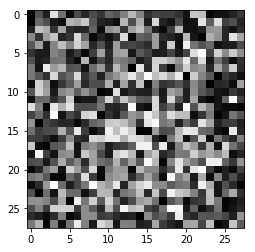

epoch: 0
discriminator loss: 0.5128556489944458        generator loss: 2.1096251010894775


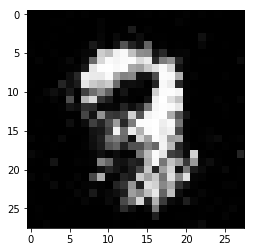

epoch: 10
discriminator loss: 1.0477641820907593        generator loss: 1.071620225906372


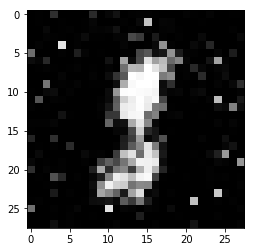

epoch: 20
discriminator loss: 1.0869839191436768        generator loss: 1.337195873260498


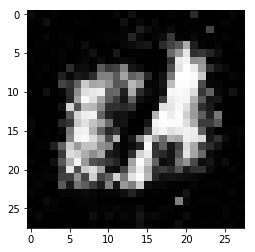

epoch: 30
discriminator loss: 1.2683467864990234        generator loss: 0.8639678955078125


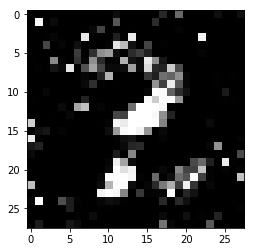

epoch: 40
discriminator loss: 1.051248550415039        generator loss: 1.2565418481826782


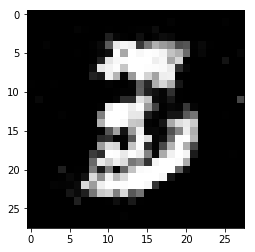

epoch: 50
discriminator loss: 1.2913521528244019        generator loss: 0.8021425604820251


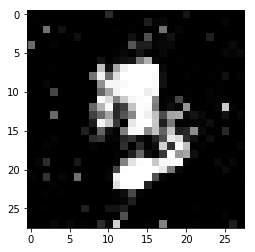

epoch: 60
discriminator loss: 1.3078442811965942        generator loss: 0.8904868364334106


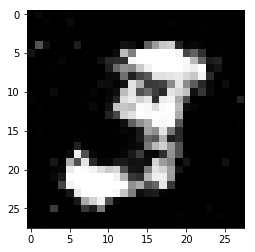

epoch: 70
discriminator loss: 1.328688383102417        generator loss: 0.7300077080726624


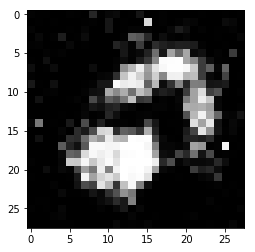

epoch: 80
discriminator loss: 1.281750202178955        generator loss: 0.7879825234413147


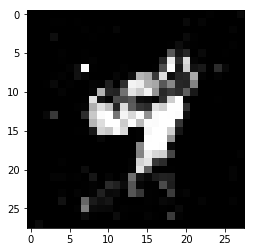

epoch: 90
discriminator loss: 1.329549789428711        generator loss: 0.7494193911552429


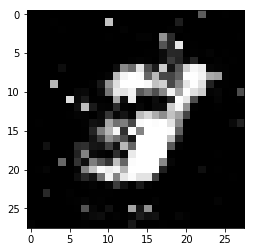

epoch: 100
discriminator loss: 1.364105224609375        generator loss: 0.7699402570724487


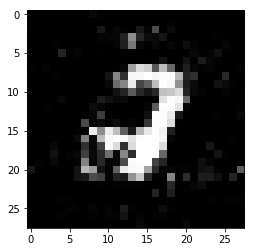

epoch: 110
discriminator loss: 1.3383510112762451        generator loss: 0.7282325029373169


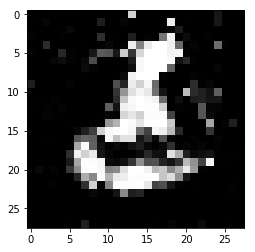

epoch: 120
discriminator loss: 1.2880322933197021        generator loss: 0.7622639536857605


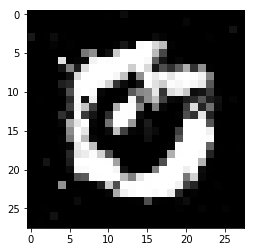

epoch: 130
discriminator loss: 1.3331317901611328        generator loss: 0.7604944705963135


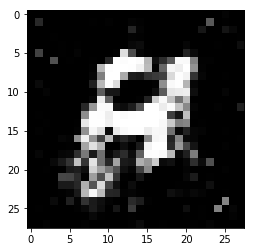

epoch: 140
discriminator loss: 1.4103472232818604        generator loss: 0.6883233785629272


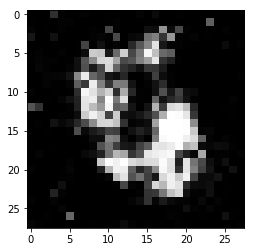

epoch: 150
discriminator loss: 1.3326048851013184        generator loss: 0.7803912162780762


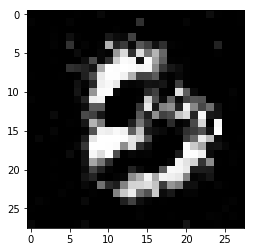

epoch: 160
discriminator loss: 1.365352749824524        generator loss: 0.7412775158882141


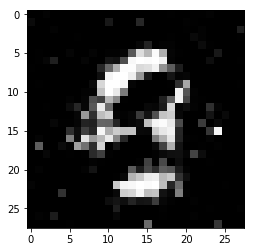

epoch: 170
discriminator loss: 1.4231138229370117        generator loss: 0.7196215391159058


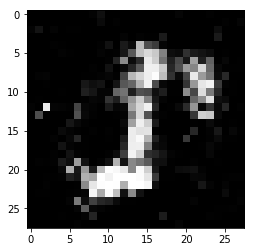

epoch: 180
discriminator loss: 1.4212507009506226        generator loss: 0.7019439935684204


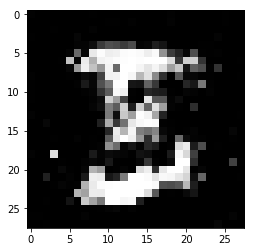

epoch: 190
discriminator loss: 1.3792126178741455        generator loss: 0.7754390239715576


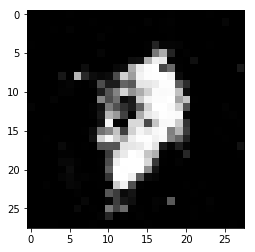

epoch: 200
discriminator loss: 1.322019100189209        generator loss: 0.7308517694473267


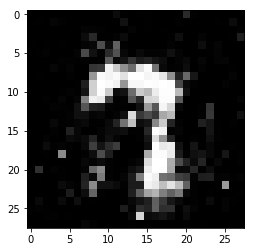

epoch: 210
discriminator loss: 1.4362986087799072        generator loss: 0.7435460686683655


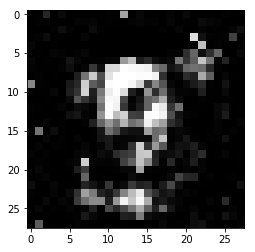

epoch: 220
discriminator loss: 1.394545078277588        generator loss: 0.7137579917907715


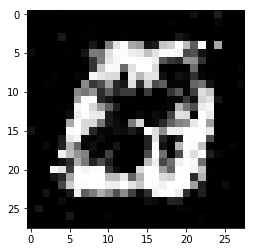

epoch: 230
discriminator loss: 1.3761534690856934        generator loss: 0.7168154716491699


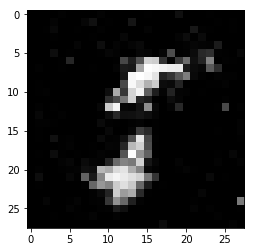

epoch: 240
discriminator loss: 1.3707716464996338        generator loss: 0.728564977645874


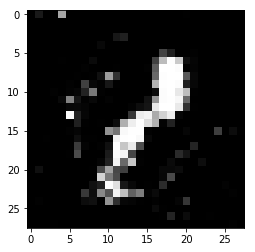

epoch: 250
discriminator loss: 1.3133958578109741        generator loss: 0.7501720786094666


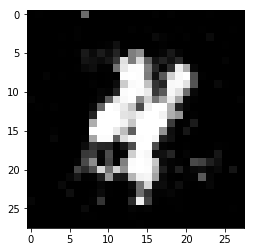

epoch: 260
discriminator loss: 1.3806041479110718        generator loss: 0.7394722700119019


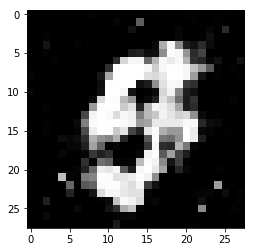

epoch: 270
discriminator loss: 1.3612695932388306        generator loss: 0.7344794273376465


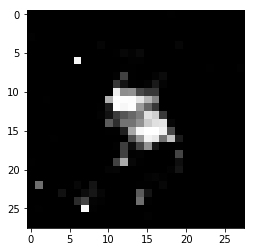

epoch: 280
discriminator loss: 1.3616664409637451        generator loss: 0.7164605855941772


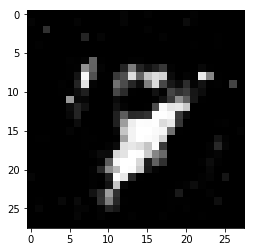

epoch: 290
discriminator loss: 1.366346836090088        generator loss: 0.8080081343650818


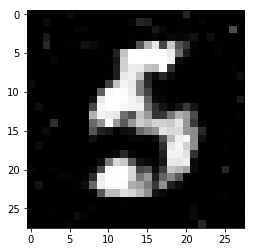

epoch: 300
discriminator loss: 1.336660385131836        generator loss: 0.7464910745620728


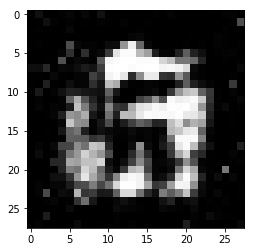

epoch: 310
discriminator loss: 1.2951765060424805        generator loss: 0.7937125563621521


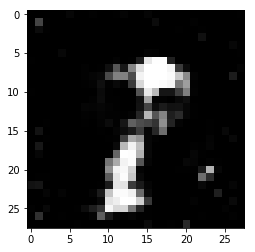

epoch: 320
discriminator loss: 1.3167893886566162        generator loss: 0.8030543923377991


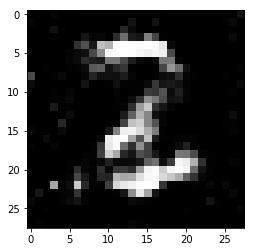

epoch: 330
discriminator loss: 1.3563792705535889        generator loss: 0.8012955188751221


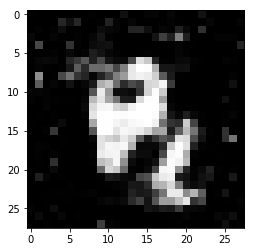

epoch: 340
discriminator loss: 1.3273322582244873        generator loss: 0.738764226436615


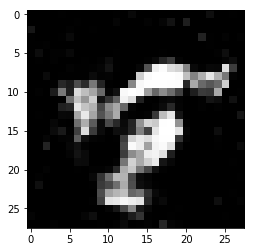

epoch: 350
discriminator loss: 1.2961149215698242        generator loss: 0.7716878652572632


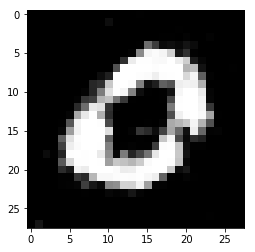

epoch: 360
discriminator loss: 1.3834971189498901        generator loss: 0.717619776725769


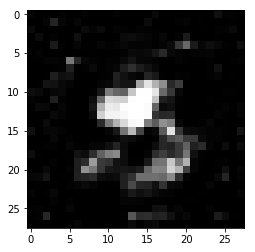

epoch: 370
discriminator loss: 1.3274425268173218        generator loss: 0.7779322862625122


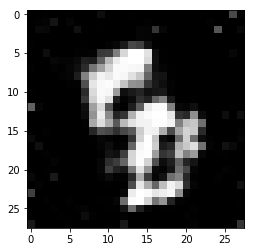

epoch: 380
discriminator loss: 1.3639564514160156        generator loss: 0.7761368751525879


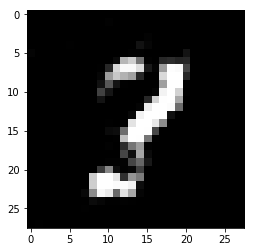

epoch: 390
discriminator loss: 1.3835140466690063        generator loss: 0.7802523970603943


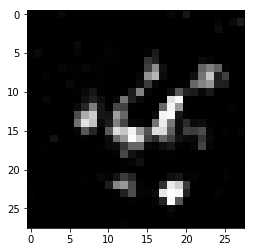

epoch: 400
discriminator loss: 1.3522193431854248        generator loss: 0.7795042991638184


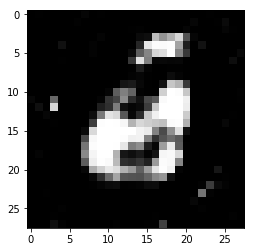

epoch: 410
discriminator loss: 1.3623485565185547        generator loss: 0.7767713665962219


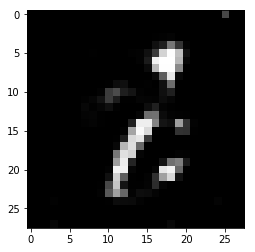

epoch: 420
discriminator loss: 1.362255334854126        generator loss: 0.7565569281578064


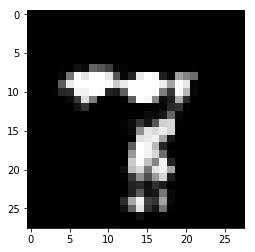

epoch: 430
discriminator loss: 1.28318190574646        generator loss: 0.75682532787323


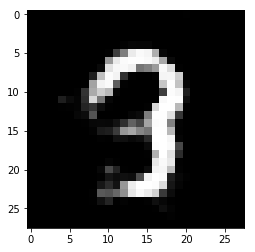

epoch: 440
discriminator loss: 1.3647679090499878        generator loss: 0.7336896061897278


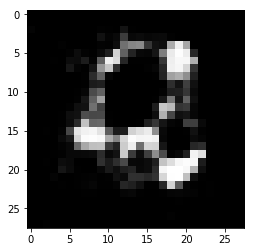

epoch: 450
discriminator loss: 1.3924856185913086        generator loss: 0.7421126961708069


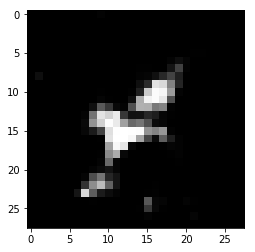

epoch: 460
discriminator loss: 1.3856539726257324        generator loss: 0.7466425895690918


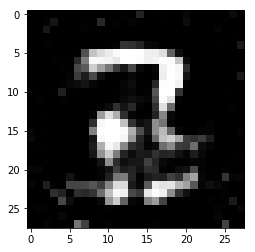

epoch: 470
discriminator loss: 1.3937139511108398        generator loss: 0.7286872267723083


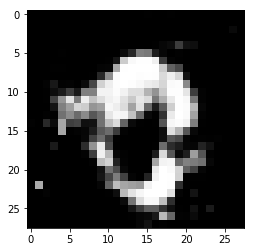

epoch: 480
discriminator loss: 1.345884084701538        generator loss: 0.7622858285903931


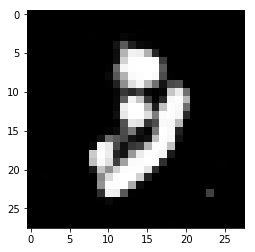

epoch: 490
discriminator loss: 1.353315830230713        generator loss: 0.7241674065589905


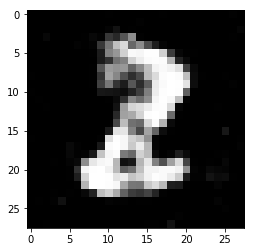

epoch: 500
discriminator loss: 1.3764517307281494        generator loss: 0.771373987197876


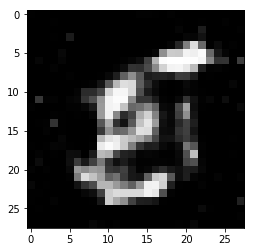

epoch: 510
discriminator loss: 1.351088047027588        generator loss: 0.7605038285255432


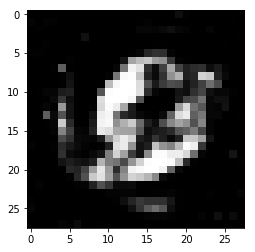

epoch: 520
discriminator loss: 1.3273274898529053        generator loss: 0.7719792723655701


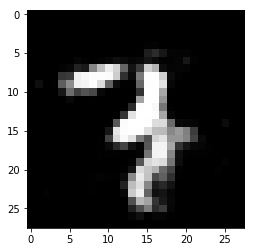

epoch: 530
discriminator loss: 1.3354041576385498        generator loss: 0.7486142516136169


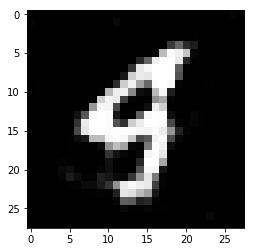

epoch: 540
discriminator loss: 1.3424015045166016        generator loss: 0.7420738935470581


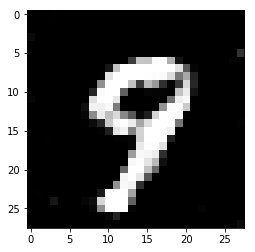

epoch: 550
discriminator loss: 1.339898705482483        generator loss: 0.7293991446495056


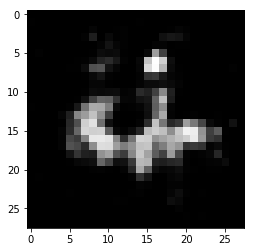

epoch: 560
discriminator loss: 1.3404903411865234        generator loss: 0.7451013326644897


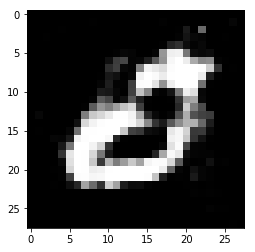

epoch: 570
discriminator loss: 1.3497323989868164        generator loss: 0.7229629158973694


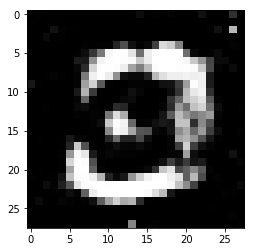

epoch: 580
discriminator loss: 1.3685917854309082        generator loss: 0.7595667839050293


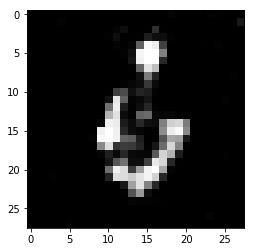

epoch: 590
discriminator loss: 1.3844717741012573        generator loss: 0.756675124168396


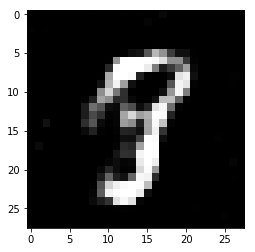

epoch: 600
discriminator loss: 1.3753244876861572        generator loss: 0.7512056231498718


KeyboardInterrupt: 

In [11]:
for i in range(epoch):
    for j in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(100)
        batch_images = batch[0].reshape((batch_size, 784))
        batch = batch_images*2 - 1
        feed_dict = {x: batch, z: np.random.uniform(-1., 1., size=[batch_size, 100])}
        _, d_error, d_pred_real, d_pred_fake = session.run(
            [D_opt, D_loss, D_real, D_fake], feed_dict=feed_dict
        )

        # 2. Train Generator
        feed_dict = {z: np.random.uniform(-1., 1., size=[len(batch[0]), 100])}
        _, g_error = session.run(
            [G_opt, G_loss], feed_dict=feed_dict
        )
    if i % 10 == 0:
            save_path = saver.save(session, "/tmp/my_model.ckpt")
            # Generate images from test noise
            test_images = session.run(
                generated_image, feed_dict={z:np.random.uniform(-1., 1., size=[1, 100])}
            )
            test_images = test_images.reshape(28,28)
            plt.imshow(test_images, cmap='gray')
            plt.show()
            
            print('epoch: {}'.format(i))
            print('discriminator loss: {}        generator loss: {}'.format(d_error, g_error))

    
save_path = saver.save(session, "/tmp/my_model_final.ckpt")
        